# 1998 Project: Alcohol Consumption in Different Countries

NetID:
aac225

In [1]:
from google.colab import files


uploaded = files.upload()

Saving Sleep_Efficiency.csv to Sleep_Efficiency.csv


In [3]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['Sleep_Efficiency.csv']))
print(df)

      ID  Age  Gender              Bedtime          Wakeup time  \
0      1   65  Female  2021-03-06 01:00:00  2021-03-06 07:00:00   
1      2   69    Male  2021-12-05 02:00:00  2021-12-05 09:00:00   
2      3   40  Female  2021-05-25 21:30:00  2021-05-25 05:30:00   
3      4   40  Female  2021-11-03 02:30:00  2021-11-03 08:30:00   
4      5   57    Male  2021-03-13 01:00:00  2021-03-13 09:00:00   
..   ...  ...     ...                  ...                  ...   
447  448   27  Female  2021-11-13 22:00:00  2021-11-13 05:30:00   
448  449   52    Male  2021-03-31 21:00:00  2021-03-31 03:00:00   
449  450   40  Female  2021-09-07 23:00:00  2021-09-07 07:30:00   
450  451   45    Male  2021-07-29 21:00:00  2021-07-29 04:00:00   
451  452   18    Male  2021-03-17 02:30:00  2021-03-17 10:00:00   

     Sleep duration  Sleep efficiency  REM sleep percentage  \
0               6.0              0.88                    18   
1               7.0              0.66                    19   
2     

In [4]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [5]:
sleep = pd.read_csv('Sleep_Efficiency.csv').dropna()
sleep.head(5)

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


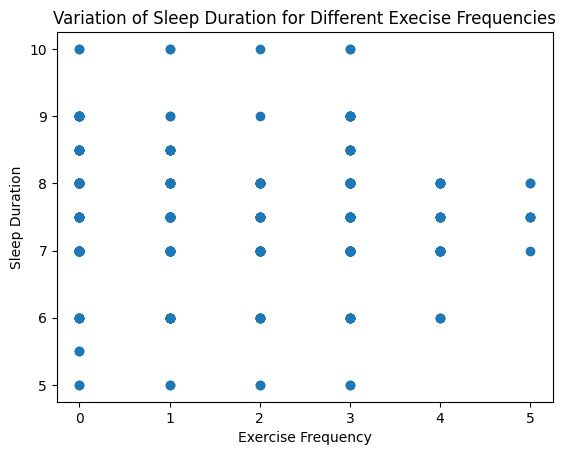

In [6]:
A = pd.DataFrame(sleep,columns=['Exercise frequency', 'Sleep duration'])
plt.scatter(A['Exercise frequency'], A['Sleep duration'])

plt.title('Variation of Sleep Duration for Different Execise Frequencies')
plt.xlabel('Exercise Frequency')
plt.ylabel('Sleep Duration')

plt.show()

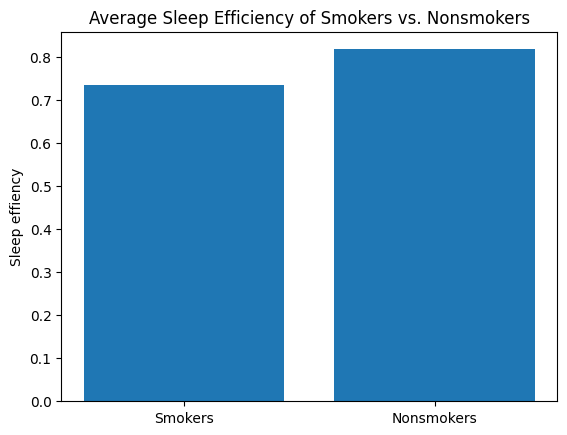

In [7]:
B = pd.DataFrame(sleep, columns = ['Smoking status', 'Sleep efficiency'])
Smoker = B.loc[B['Smoking status'] == 'Yes']
Nonsmoker = B.loc[B['Smoking status'] == 'No']

# Dividing the data into categories (Note how .mean() is being used here!)
bar1 = (Smoker['Sleep efficiency']).mean()
bar2 = (Nonsmoker['Sleep efficiency']).mean()

# Adding the two bars and assigning attributes
plt.bar([0,1],[bar1,bar2],align='center')

# Add a suitable title
plt.title('Average Sleep Efficiency of Smokers vs. Nonsmokers')

# Adding suitable labels to the axes
plt.xticks([0,1],['Smokers','Nonsmokers'])
plt.ylabel('Sleep effiency')

# Render the plot
plt.show()

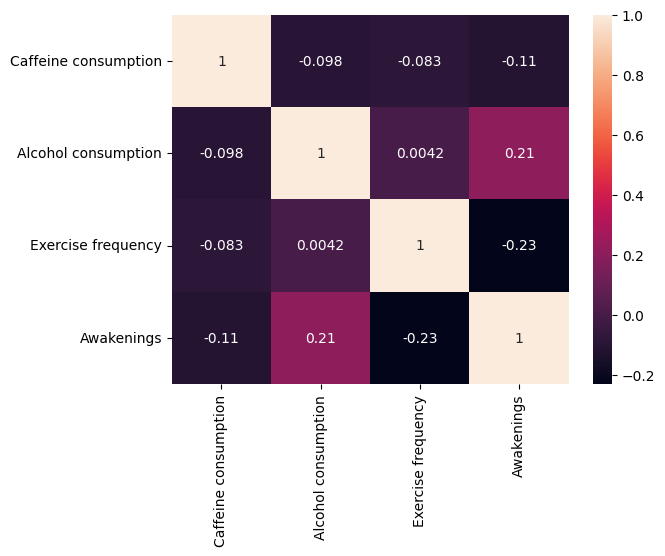

In [9]:
import seaborn as sns
C = pd.DataFrame(sleep, columns = ['Caffeine consumption', 'Alcohol consumption', 'Exercise frequency', 'Awakenings'])

corr = C.corr() # Get the correlation matrix
sns.heatmap(corr, annot=True) # Although it is called heatmap here, it nonetheless shows the pairwise correlation between features.
plt.show()

In [10]:
#Predict the sleep efficiency based on age using Logistics Regressions
X = sleep[['Age']]
Y = sleep['Sleep efficiency']

x_not_test, x_test, y_not_test, y_test = train_test_split(X,Y, test_size=0.25,random_state=42)
x_train, x_valid, y_train, y_valid = train_test_split(x_not_test,y_not_test,test_size=0.25,random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

print("coefficients:", model.coef_)
print("training score:", model.score(x_train,y_train))
print("validation score:", model.score(x_valid,y_valid))
print("testing score:", model.score(x_test,y_test))
#Track accuracies

coefficients: [0.00195494]
training score: 0.035641230610440444
validation score: 0.01100244372901471
testing score: -0.09834935009989088


In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [12]:
X = sleep[['Caffeine consumption','Exercise frequency']]
Y = sleep['Sleep efficiency']

x_train,x_test,y_train,y_test = train_test_split(X.astype('int'),Y.astype('int'),test_size=0.3,random_state=4)

model = KNeighborsClassifier(3)
model.fit(x_train,y_train)
prediction = model.predict(x_test)
accuracy = accuracy_score(prediction, y_test)
print("The prediction of how accurate the relationship between the amount of caffiene consumption + exercise frequency and sleep efficiency is " + str(accuracy) +".")

The prediction of how accurate the relationship between the amount of caffiene consumption + exercise frequency and sleep efficiency is 1.0.


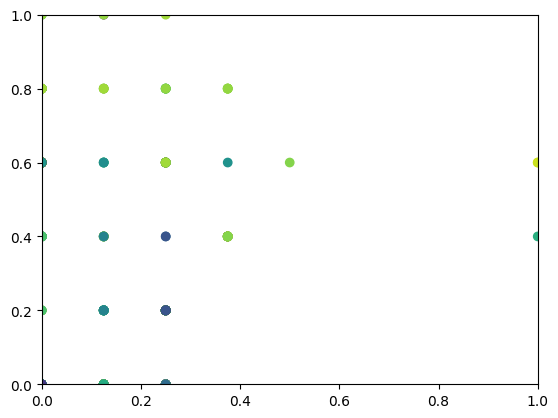

In [13]:
scaled_data = sleep.copy()
min_caffeine = sleep['Caffeine consumption'].min()
max_caffeine = sleep['Caffeine consumption'].max()
min_exercise = sleep['Exercise frequency'].min()
max_exercise = sleep['Exercise frequency'].max()
scaled_data['Caffeine consumption'] = (scaled_data['Caffeine consumption']-min_caffeine)/(max_caffeine - min_caffeine)
scaled_data['Exercise frequency'] = (scaled_data['Exercise frequency']-min_exercise)/(max_exercise - min_exercise)

plt.scatter(scaled_data['Caffeine consumption'],scaled_data['Exercise frequency'],c=scaled_data['Sleep efficiency'].values.ravel())
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

Conclusion:
    Our hypothesis was that if an individual is older and a smoker with a higher consumption of alcohol and/or coffee but less exercise, they will have a lower sleep efficiency; however, our data analysis does not offer strong evidence in favor of our thesis. In the scatter plot demonstrating the relationship between exercise frequency and sleep efficiency, as the frequency increased, the variance and values of sleep efficiency decreased. The bar graph shows the average sleep efficiency for those who smoke and those who don't. The difference between the two groups is not very significant and one cannot confidently say that smoking impacts sleep efficiency. The heat map has low values for the relationship between awakenings in the night and caffeine consumption and exercise frequency; however, the relationship between alcohol consumption and awakenings is much higher than the other values, showing that with increased alcohol intake, there are increase awakenings in the night, and thus, lower sleep effiency. The small difference between the testing and training scores from the logistic regression indicates that overfitting was avoided. The low validation score also means that the model needs some more training to have better results. The KNN model resulted in a high prediction accuracy between caffeine and exercise and its graph demonstrates that the lower the coffee consumption, the better the sleep efficiency. The fact that exercise frequency does not impact sleep efficiency is echoed from the scatter plot in the KNN plot. Therefore, higher alcohol consumption has a noticable impact on sleep efficiency whereas caffeine consumption and exercise frequency do not.